### Import Statements

In [107]:
import numpy as np
import pandas as pd
import vcf
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats

%matplotlib inline

In [108]:
import bioframe as bf

In [109]:
import plotly.express as px

In [110]:
from Bio import SeqIO
import plotly.express as px

# https://github.com/ipython/ipython/issues/10627
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [111]:
import ete3 as rec
import ete3 as ETE

from ete3 import Tree

In [112]:
import json

In [113]:
import ast

#### Pandas Viewing Settings

In [114]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [115]:
import time

# Import/parse processed H37rv genome annotations

In [116]:
RepoRef_Dir = "../../References"
AnnotatedGenes_And_IntergenicRegions_RepoRef_Dir = f"{RepoRef_Dir}/201027_H37rv_AnnotatedGenes_And_IntergenicRegions"
H37Rv_GenomeAnnotations_Genes_TSV = f"{AnnotatedGenes_And_IntergenicRegions_RepoRef_Dir}/H37Rv_GenomeAnnotations.Genes.tsv"

## H37Rv Gene Annotations TSV
H37Rv_GenomeAnno_Genes_DF = pd.read_csv(H37Rv_GenomeAnnotations_Genes_TSV, sep = "\t")
H37Rv_GeneInfo_Subset_DF = H37Rv_GenomeAnno_Genes_DF[["H37rv_GeneID", "Symbol", "Feature", "Functional_Category", "Is_Pseudogene", "Product", "PEandPPE_Subfamily", "ExcludedGroup_Category"]]

RvID_To_Symbol_Dict = dict(H37Rv_GeneInfo_Subset_DF[['H37rv_GeneID', 'Symbol']].values)
Symbol_To_FuncCat_Dict = dict(H37Rv_GeneInfo_Subset_DF[['Symbol', 'Functional_Category']].values)


# Parse sample metadata & preprocessed genome info/results

In [117]:
Repo_DataDir = "../../Data"
InputAsmPath_Dir = f"{Repo_DataDir}/231121.InputAsmTSVs.MtbSetV3.151CI"

MtbSetV3_151CI_InputAsmPATHs_TSV = f"{InputAsmPath_Dir}/231121.MtbSetV3.151CI.HybridAndSRAsm.FAPATHs.V1.tsv"
MtbSetV3_151CI_AsmSumm_TSV = f"{InputAsmPath_Dir}/231121.MtbSetV3.151CI.HybridAsm.AsmSummary.V2.tsv"

## Parse sample Metadata (N = 151)

In [118]:
WGA151CI_AsmSummary_DF = pd.read_csv(MtbSetV3_151CI_AsmSumm_TSV, sep = "\t")

SampleIDs_151CI_SOI = list( WGA151CI_AsmSummary_DF["SampleID"].values )
WGA151CI_SampleIDs = SampleIDs_151CI_SOI

ID_To_PrimLineage_Dict = dict(WGA151CI_AsmSummary_DF[['SampleID', 'PrimaryLineage']].values)
ID_To_SubLineage_Dict = dict( WGA151CI_AsmSummary_DF[["SampleID", "Lineage"]].values)
ID_To_Dataset_Dict = dict(WGA151CI_AsmSummary_DF[['SampleID', 'Dataset_Tag']].values)
WGA151CI_AsmSummary_DF.shape

(151, 7)

# Define output dir of the Mtb-WGA-SMK processing pipeline

In [119]:
WGA_SMK_Outputs_Dir = "/n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output"

WGA151CI_SMK_OutputDir = WGA_SMK_Outputs_Dir + "/231121_MtbSetV3_151CI"
MtbWGA_SMK_Pipeline_OutputDir = WGA151CI_SMK_OutputDir

### Define paths to processed analysis of SV Pan-genome graph (minigraph)

In [120]:
PangenomeAnalysis_Dir = "../../Data/MtbPangenomeAnalysis_SetV4"

MG_Node_KmerVsRefSets_TSV_GZ = f"{PangenomeAnalysis_Dir}/MtbSVPG.NodeKmerComp.Summary.V1.tsv.gz" 

MG_AvA_Node_KmerAnalysis_TSV_GZ = f"{PangenomeAnalysis_Dir}/MtbSVPG.NodeKmerComp.AllVsAll.V1.tsv.gz"     

MG_BubbleSumm_TSV_GZ = f"{PangenomeAnalysis_Dir}/MtbSVPG.BubbleSummary.BED.tsv.gz"     

MG_SVVCF_TSV_GZ = f"{PangenomeAnalysis_Dir}/MtbSVPG.BubbleAlleleInfo.SVVCF.tsv.gz" 

MG_SVInfo_TSV_GZ = f"{PangenomeAnalysis_Dir}/MtbSVPG.BubbleAlleleInfo.SVInfo.tsv.gz" 


### Parse in `AvA_Nodes_DF`

In [121]:
AvA_Nodes_DF = pd.read_csv(MG_AvA_Node_KmerAnalysis_TSV_GZ, sep = "\t" )
AvA_Nodes_DF.shape

(123104, 6)

In [122]:
AvA_Nodes_DF.head()

,RecordID_1,RecordID_2,Record1_Len,Record2_Len,JaccardSim,JaccardContain
0,s3,s2959,56,61,0.781250,0.961538
1,s7,s2247,1876,42,0.006501,0.006501
2,s8,s2823,542,87,0.096339,0.097656
3,s13,s2037,24063,49,0.000208,0.000208
4,s13,s2039,24063,114,0.000208,0.000208


### Parse in `MG_Nodes_KmerVsRefSets_DF`

In [123]:
MG_Nodes_KmerComp_DF = pd.read_csv(MG_Node_KmerVsRefSets_TSV_GZ, sep = "\t" )
MG_Nodes_KmerComp_DF.shape

(3138, 8)

In [124]:
MG_Nodes_KmerComp_DF.head()

,NodeID,SeqLength,Jaccard_Cont_WiRv,Jaccard_Cont_WiIS6110,Jaccard_Cont_WiRv_InsSeqAndPhages,IsSVNode,BubbleID,MaxJC_ToOtherNode
0,s1,1533,1.0,0.0,0.0,False,None,0.000000
1,s2,58,1.0,0.0,0.0,False,None,0.000000
2,s3,56,1.0,0.0,0.0,True,BubbleRegion_2,0.961538
3,s4,5,0.0,0.0,0.0,True,BubbleRegion_2,0.000000
4,s5,11970,1.0,0.0,0.0,False,None,0.000000


### Parse in `MG_SV_BED_DF`

In [125]:
MG_SV_BED_DF = pd.read_csv(MG_BubbleSumm_TSV_GZ, sep = "\t" )

# Convert the string representation of the list of nodes to python list of nodes
MG_SV_BED_DF["NodePath_Trimmed"] = MG_SV_BED_DF["NodePath_Trimmed"].apply(ast.literal_eval)

MG_SV_BED_DF.shape

(535, 14)

In [126]:
MG_SV_BED_DF.head(3)

,Chr,Start,End,Len_Ref,Len_Alt,NodePath,NodePath_Trimmed,Start_Node,End_Node,BubbleNum,BubbleID,NumSVNodes,Overlap_Genes,Overlap_Gene_RvIDs
0,NC_000962.3,1533,1533,0,0,"s1,s2",[],s1,s2,1,BubbleRegion_1,0,NaN,NaN
1,NC_000962.3,1591,1652,61,1480,"s2,s2034,s2959,s2035,s3,s2036,s2036,s3,s2035,s...","[s2034, s2959, s2035, s3, s2036, s2036, s3, s2...",s2,s5,2,BubbleRegion_2,11,NaN,NaN
2,NC_000962.3,13622,13622,0,1358,"s5,s2744,s6",[s2744],s5,s6,3,BubbleRegion_3,1,NaN,NaN


### Parse in `MG_SVVCF_DF`

In [127]:
MG_SVVCF_DF = pd.read_csv(MG_SVVCF_TSV_GZ, sep = "\t" )
MG_SVVCF_DF.shape

(535, 169)

### Parse in `MG_SVInfo_DF`

In [128]:
MG_SVInfo_DF = pd.read_csv(MG_SVInfo_TSV_GZ, sep = "\t" )
MG_SVInfo_DF.shape

(535, 160)

In [129]:
MG_SV_BED_DF["NodePath_Trimmed"].values[:2]

array([list([]),
       list(['s2034', 's2959', 's2035', 's3', 's2036', 's2036', 's3', 's2035', 's2959', 's2034', 's4'])],
      dtype=object)

In [130]:
MG_SV_BED_DF.head(4)

,Chr,Start,End,Len_Ref,Len_Alt,NodePath,NodePath_Trimmed,Start_Node,End_Node,BubbleNum,BubbleID,NumSVNodes,Overlap_Genes,Overlap_Gene_RvIDs
0,NC_000962.3,1533,1533,0,0,"s1,s2",[],s1,s2,1,BubbleRegion_1,0,NaN,NaN
1,NC_000962.3,1591,1652,61,1480,"s2,s2034,s2959,s2035,s3,s2036,s2036,s3,s2035,s...","[s2034, s2959, s2035, s3, s2036, s2036, s3, s2...",s2,s5,2,BubbleRegion_2,11,NaN,NaN
2,NC_000962.3,13622,13622,0,1358,"s5,s2744,s6",[s2744],s5,s6,3,BubbleRegion_3,1,NaN,NaN
3,NC_000962.3,26469,28345,42,1876,"s6,s2247,s7,s8","[s2247, s7]",s6,s8,4,BubbleRegion_4,2,"Rv0021c,whiB5,Rv0023","Rv0021c,Rv0022c,Rv0023"


### Create Dict of SV Node ID to BubbleID mappings

In [131]:
NodeID_ToBubbleID_Dict = {}

for i, row in MG_SV_BED_DF.iterrows():
    
    i_BubbleID =  row["BubbleID"]
    i_NodePath_Trimmed = row["NodePath_Trimmed"]

    # Map all SV nodes to their Bubble Region ID
    for NodeID in i_NodePath_Trimmed:
        NodeID_ToBubbleID_Dict[NodeID] = i_BubbleID
        

In [132]:
list(NodeID_ToBubbleID_Dict.items())[:10]

[('s2034', 'BubbleRegion_2'),
 ('s2959', 'BubbleRegion_2'),
 ('s2035', 'BubbleRegion_2'),
 ('s3', 'BubbleRegion_2'),
 ('s2036', 'BubbleRegion_2'),
 ('s4', 'BubbleRegion_2'),
 ('s2744', 'BubbleRegion_3'),
 ('s2247', 'BubbleRegion_4'),
 ('s7', 'BubbleRegion_4'),
 ('s2823', 'BubbleRegion_5')]

## Create dictionary of BubbleID to overlapping H37Rv gene annotations

In [133]:
BubbleID_To_OvrLapGenes_Dict = MG_SV_BED_DF.set_index("BubbleID")["Overlap_Genes"].to_dict()

#### Peak at the genes overlapping the first 10 bubble regions

In [134]:
list(BubbleID_To_OvrLapGenes_Dict.items())[:10]

[('BubbleRegion_1', nan),
 ('BubbleRegion_2', nan),
 ('BubbleRegion_3', nan),
 ('BubbleRegion_4', 'Rv0021c,whiB5,Rv0023'),
 ('BubbleRegion_5', 'Rv0024'),
 ('BubbleRegion_6', 'bioF2'),
 ('BubbleRegion_7', nan),
 ('BubbleRegion_8', nan),
 ('BubbleRegion_9', nan),
 ('BubbleRegion_10', 'Rv0063')]

# Let's make a MODDED version of SVVCF DF

In [135]:
SampleID_Cols = ['NC_000962.3', 'mada_2-46', 'mada_1-44', 'mada_107', 'mada_1-1', 'mada_1-51',
                                        'mada_1-39', 'mada_122', 'mada_1-36', 'mada_117', 'mada_118', 'mada_1-10',
                                        'N0072', 'N0153', 'R27252', 'R23887', '9050-05', '3003-06', '702-06',
                                        'TB3091', '696-05', '8651-04', 'TB3396', '4549-04', 'TB1612', 'TB1236',
                                        'TB2659', '8129-04', 'TB2780', 'TB3368', 'R30215', 'R25048', 'R30078',
                                        'R28012', 'R27657', 'R30234', 'R31095', 'R28703', 'R24120', 'R36431',
                                        'R29816', 'S0070-08', 'TB2512', 'TB2981', 'TB2995', '706-05', 'TB3113',
                                        'R29598', 'R24100', 'S0107-01', 'R28581', 'S0256-08', 'S0085-01', 'S0089-01',
                                        'N0145', 'mada_1-11', 'N0155', 'mada_115', 'mada_2-42', 'M0003941_3', 'R37765',
                                        '18_0621851', 'R27937', 'R22601', 'R18040', 'R18043', 'R27725', 'R26791',
                                        'R20574', 'R20260', 'R21408', 'R23146', 'R28980', 'R26778', 'R32929', 'R30420',
                                        'R21893', 'QC-9', 'QC-5', 'QC-3', 'N0004', 'mada_1-30', 'N0054', 'N1274', 'mada_1-53',
                                        'mada_2-53', 'mada_1-50', 'mada_2-1', 'R23571', 'mada_123', 'mada_1-12', 'mada_128', 'mada_1-15',
                                        'TB2968', 'mada_1-38', '01_R1134', 'mada_126', 'mada_120', 'TB3054', 'TB4620', 'M0016737_0',
                                        'mada_112', 'mada_124', 'mada_103', 'S0123-01', 'S0262-02', '02_R1896', 'mada_2-25', 'TB3237',
                                        '01_R1430', 'M0011368_9', 'TB2661', 'TB3386', 'TB3162', '02_R1179', 'QC-6', 'QC-1', 'QC-7',
                                        'M0010874_7', 'M0016395_7', 'R15311', 'TB3251', 'M0014888_3', 'mada_151', 'TB3169',
                                        'mada_105', 'QC-8', 'QC-10', 'QC-4', 'mada_129', '02_R1708', '02_R0894', 'mada_139',
                                        'TB3334', 'MT_0080', 'mada_102', 'R21839', 'R21363', 'R21770', 'R30396', 'R20896',
                                        'mada_1-32', 'S0106-01', 'M0017522_5', 'mada_2-31', 'mada_1-41', 'N1272', 'N1176',
                                        'N1202', 'N0091', 'N1177', 'RW-TB008']

len(SampleID_Cols)

152

In [136]:
#MG_SVVCF_DF[SampleID_Cols].str.split(";").str[1]

In [137]:
MG_SVVCF_Mod_DF = MG_SVVCF_DF.copy()

In [138]:
#MG_SVVCF_DF[SampleID_Cols].applymap(lambda x: x.split(":")[0]) 

In [139]:
MG_SVVCF_DF.head(2)

,Chr,Pos,ID,Ref,Alt,QUAL,FILTER,Info,FORMAT,NC_000962.3,N0072,N0153,TB3113,TB1236,TB2659,TB2780,TB1612,TB2512,TB2981,TB3091,M0003941_3,TB3368,N0145,N0155,TB2995,TB3396,N0004,N1274,N0054,02_R1179,01_R1134,M0017522_5,M0016395_7,M0010874_7,02_R1708,02_R0894,01_R1430,M0014888_3,02_R1896,TB4620,TB3162,MT_0080,TB3054,TB3251,M0016737_0,TB2661,TB3237,TB3169,TB3386,TB3334,M0011368_9,TB2968,N1272,N1176,N1202,N1177,N0091,RW-TB008,9050-05,4549-04,696-05,702-06,706-05,8129-04,3003-06,8651-04,QC-3,QC-9,QC-5,QC-8,QC-10,QC-4,QC-7,QC-6,QC-1,mada_1-10,mada_2-46,mada_1-1,mada_1-36,mada_1-39,mada_1-51,mada_1-44,mada_117,mada_118,mada_122,mada_107,R27252,R23887,R30215,R30078,R29816,R30234,18_0621851,R36431,R28703,mada_115,mada_2-42,R31095,R28012,R37765,R27657,R25048,R24120,R28581,R29598,mada_1-11,R24100,R21408,R20574,R20260,R18043,R22601,R23146,R32929,R21893,R30420,R26778,R26791,R28980,R27725,R18040,R27937,mada_1-30,mada_2-31,mada_1-41,R21770,R21839,mada_1-32,R30396,R21363,R20896,mada_102,mada_129,mada_139,mada_151,mada_105,R15311,mada_103,mada_2-25,mada_112,mada_124,mada_126,mada_120,R23571,mada_128,mada_1-12,mada_1-15,mada_2-1,mada_1-53,mada_1-50,mada_123,mada_2-53,mada_1-38,S0070-08,S0085-01,S0107-01,S0089-01,S0256-08,S0123-01,S0106-01,S0262-02,NA,AWALK_Full,AWALK_List,BubbleID,Start_Node,End_Node,NodePath_Trimmed,NumSVNodes
0,NC_000962.3,1533,.,N,<CNV>,30,PASS,NS=152;NA=1;ALEN=0;AC=152;VS=>s1;VE=>s2;AWALK=...,GT:GT0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,1,*,['*'],BubbleRegion_1,s1,s2,[],0
1,NC_000962.3,1591,.,N,<CNV>,30,PASS,NS=88;NA=1;ALEN=61;AC=88;VS=>s2;VE=>s5;AWALK=>...,GT:GT0,0:0,0:0,0:0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,.,0:0,0:0,.,.,.,.,.,.,.,.,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,0:0,.,0:0,0:0,.,.,.,.,.,0:0,0:0,0:0,1,>s3>s4,['>s3>s4'],BubbleRegion_2,s2,s5,"['s2034', 's2959', 's2035', 's3', 's2036', 's2...",11


In [140]:
MG_SVVCF_Mod_DF = MG_SVVCF_DF.copy()

MG_SVVCF_Mod_DF[SampleID_Cols] = MG_SVVCF_DF[SampleID_Cols].applymap(lambda x: 0 if x == "."  else int(x.split(":")[1]))
MG_SVVCF_Mod_DF.index = MG_SVVCF_Mod_DF["BubbleID"]
MG_SVVCF_Mod_DF.shape

(535, 169)

In [141]:
MG_SVVCF_Mod_DF.head(2)

,Chr,Pos,ID,Ref,Alt,QUAL,FILTER,Info,FORMAT,NC_000962.3,N0072,N0153,TB3113,TB1236,TB2659,TB2780,TB1612,TB2512,TB2981,TB3091,M0003941_3,TB3368,N0145,N0155,TB2995,TB3396,N0004,N1274,N0054,02_R1179,01_R1134,M0017522_5,M0016395_7,M0010874_7,02_R1708,02_R0894,01_R1430,M0014888_3,02_R1896,TB4620,TB3162,MT_0080,TB3054,TB3251,M0016737_0,TB2661,TB3237,TB3169,TB3386,TB3334,M0011368_9,TB2968,N1272,N1176,N1202,N1177,N0091,RW-TB008,9050-05,4549-04,696-05,702-06,706-05,8129-04,3003-06,8651-04,QC-3,QC-9,QC-5,QC-8,QC-10,QC-4,QC-7,QC-6,QC-1,mada_1-10,mada_2-46,mada_1-1,mada_1-36,mada_1-39,mada_1-51,mada_1-44,mada_117,mada_118,mada_122,mada_107,R27252,R23887,R30215,R30078,R29816,R30234,18_0621851,R36431,R28703,mada_115,mada_2-42,R31095,R28012,R37765,R27657,R25048,R24120,R28581,R29598,mada_1-11,R24100,R21408,R20574,R20260,R18043,R22601,R23146,R32929,R21893,R30420,R26778,R26791,R28980,R27725,R18040,R27937,mada_1-30,mada_2-31,mada_1-41,R21770,R21839,mada_1-32,R30396,R21363,R20896,mada_102,mada_129,mada_139,mada_151,mada_105,R15311,mada_103,mada_2-25,mada_112,mada_124,mada_126,mada_120,R23571,mada_128,mada_1-12,mada_1-15,mada_2-1,mada_1-53,mada_1-50,mada_123,mada_2-53,mada_1-38,S0070-08,S0085-01,S0107-01,S0089-01,S0256-08,S0123-01,S0106-01,S0262-02,NA,AWALK_Full,AWALK_List,BubbleID,Start_Node,End_Node,NodePath_Trimmed,NumSVNodes
BubbleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BubbleRegion_1,NC_000962.3,1533,.,N,<CNV>,30,PASS,NS=152;NA=1;ALEN=0;AC=152;VS=>s1;VE=>s2;AWALK=...,GT:GT0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,*,['*'],BubbleRegion_1,s1,s2,[],0
BubbleRegion_2,NC_000962.3,1591,.,N,<CNV>,30,PASS,NS=88;NA=1;ALEN=61;AC=88;VS=>s2;VE=>s5;AWALK=>...,GT:GT0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,>s3>s4,['>s3>s4'],BubbleRegion_2,s2,s5,"['s2034', 's2959', 's2035', 's3', 's2036', 's2...",11


In [142]:
MG_SVVCF_Mod_DF.head(193).tail(1)

,Chr,Pos,ID,Ref,Alt,QUAL,FILTER,Info,FORMAT,NC_000962.3,N0072,N0153,TB3113,TB1236,TB2659,TB2780,TB1612,TB2512,TB2981,TB3091,M0003941_3,TB3368,N0145,N0155,TB2995,TB3396,N0004,N1274,N0054,02_R1179,01_R1134,M0017522_5,M0016395_7,M0010874_7,02_R1708,02_R0894,01_R1430,M0014888_3,02_R1896,TB4620,TB3162,MT_0080,TB3054,TB3251,M0016737_0,TB2661,TB3237,TB3169,TB3386,TB3334,M0011368_9,TB2968,N1272,N1176,N1202,N1177,N0091,RW-TB008,9050-05,4549-04,696-05,702-06,706-05,8129-04,3003-06,8651-04,QC-3,QC-9,QC-5,QC-8,QC-10,QC-4,QC-7,QC-6,QC-1,mada_1-10,mada_2-46,mada_1-1,mada_1-36,mada_1-39,mada_1-51,mada_1-44,mada_117,mada_118,mada_122,mada_107,R27252,R23887,R30215,R30078,R29816,R30234,18_0621851,R36431,R28703,mada_115,mada_2-42,R31095,R28012,R37765,R27657,R25048,R24120,R28581,R29598,mada_1-11,R24100,R21408,R20574,R20260,R18043,R22601,R23146,R32929,R21893,R30420,R26778,R26791,R28980,R27725,R18040,R27937,mada_1-30,mada_2-31,mada_1-41,R21770,R21839,mada_1-32,R30396,R21363,R20896,mada_102,mada_129,mada_139,mada_151,mada_105,R15311,mada_103,mada_2-25,mada_112,mada_124,mada_126,mada_120,R23571,mada_128,mada_1-12,mada_1-15,mada_2-1,mada_1-53,mada_1-50,mada_123,mada_2-53,mada_1-38,S0070-08,S0085-01,S0107-01,S0089-01,S0256-08,S0123-01,S0106-01,S0262-02,NA,AWALK_Full,AWALK_List,BubbleID,Start_Node,End_Node,NodePath_Trimmed,NumSVNodes
BubbleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BubbleRegion_193,NC_000962.3,1761789,.,N,<CNV>,30,PASS,"NS=152;NA=3;ALEN=0,2153,3511;AC=131,20,1;VS=>s...",GT:GT0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"*,>s1800>s1801,>s1800>s2706>s1801","['*', '>s1800>s1801', '>s1800>s2706>s1801']",BubbleRegion_193,s575,s576,"['s1800', 's2706', 's1801']",3


In [143]:
MG_SVVCF_Mod_DF.head(193).tail(1)["Info"].values

array(['NS=152;NA=3;ALEN=0,2153,3511;AC=131,20,1;VS=>s575;VE=>s576;AWALK=*,>s1800>s1801,>s1800>s2706>s1801;END=1761789'],
      dtype=object)

# Create a dictionary of bubble allele states (across all genomes)

In [144]:
MG_SVVCF_Mod_Tbd1_DF = MG_SVVCF_Mod_DF.query("BubbleID == 'BubbleRegion_193'")

In [145]:
MG_SVVCF_Mod_Tbd1_DF  

,Chr,Pos,ID,Ref,Alt,QUAL,FILTER,Info,FORMAT,NC_000962.3,N0072,N0153,TB3113,TB1236,TB2659,TB2780,TB1612,TB2512,TB2981,TB3091,M0003941_3,TB3368,N0145,N0155,TB2995,TB3396,N0004,N1274,N0054,02_R1179,01_R1134,M0017522_5,M0016395_7,M0010874_7,02_R1708,02_R0894,01_R1430,M0014888_3,02_R1896,TB4620,TB3162,MT_0080,TB3054,TB3251,M0016737_0,TB2661,TB3237,TB3169,TB3386,TB3334,M0011368_9,TB2968,N1272,N1176,N1202,N1177,N0091,RW-TB008,9050-05,4549-04,696-05,702-06,706-05,8129-04,3003-06,8651-04,QC-3,QC-9,QC-5,QC-8,QC-10,QC-4,QC-7,QC-6,QC-1,mada_1-10,mada_2-46,mada_1-1,mada_1-36,mada_1-39,mada_1-51,mada_1-44,mada_117,mada_118,mada_122,mada_107,R27252,R23887,R30215,R30078,R29816,R30234,18_0621851,R36431,R28703,mada_115,mada_2-42,R31095,R28012,R37765,R27657,R25048,R24120,R28581,R29598,mada_1-11,R24100,R21408,R20574,R20260,R18043,R22601,R23146,R32929,R21893,R30420,R26778,R26791,R28980,R27725,R18040,R27937,mada_1-30,mada_2-31,mada_1-41,R21770,R21839,mada_1-32,R30396,R21363,R20896,mada_102,mada_129,mada_139,mada_151,mada_105,R15311,mada_103,mada_2-25,mada_112,mada_124,mada_126,mada_120,R23571,mada_128,mada_1-12,mada_1-15,mada_2-1,mada_1-53,mada_1-50,mada_123,mada_2-53,mada_1-38,S0070-08,S0085-01,S0107-01,S0089-01,S0256-08,S0123-01,S0106-01,S0262-02,NA,AWALK_Full,AWALK_List,BubbleID,Start_Node,End_Node,NodePath_Trimmed,NumSVNodes
BubbleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BubbleRegion_193,NC_000962.3,1761789,.,N,<CNV>,30,PASS,"NS=152;NA=3;ALEN=0,2153,3511;AC=131,20,1;VS=>s...",GT:GT0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"*,>s1800>s1801,>s1800>s2706>s1801","['*', '>s1800>s1801', '>s1800>s2706>s1801']",BubbleRegion_193,s575,s576,"['s1800', 's2706', 's1801']",3


## Make a dictionary of SV Alleles per bubble

In [146]:
MG_SVVCF_Mod_Tbd1_DF

,Chr,Pos,ID,Ref,Alt,QUAL,FILTER,Info,FORMAT,NC_000962.3,N0072,N0153,TB3113,TB1236,TB2659,TB2780,TB1612,TB2512,TB2981,TB3091,M0003941_3,TB3368,N0145,N0155,TB2995,TB3396,N0004,N1274,N0054,02_R1179,01_R1134,M0017522_5,M0016395_7,M0010874_7,02_R1708,02_R0894,01_R1430,M0014888_3,02_R1896,TB4620,TB3162,MT_0080,TB3054,TB3251,M0016737_0,TB2661,TB3237,TB3169,TB3386,TB3334,M0011368_9,TB2968,N1272,N1176,N1202,N1177,N0091,RW-TB008,9050-05,4549-04,696-05,702-06,706-05,8129-04,3003-06,8651-04,QC-3,QC-9,QC-5,QC-8,QC-10,QC-4,QC-7,QC-6,QC-1,mada_1-10,mada_2-46,mada_1-1,mada_1-36,mada_1-39,mada_1-51,mada_1-44,mada_117,mada_118,mada_122,mada_107,R27252,R23887,R30215,R30078,R29816,R30234,18_0621851,R36431,R28703,mada_115,mada_2-42,R31095,R28012,R37765,R27657,R25048,R24120,R28581,R29598,mada_1-11,R24100,R21408,R20574,R20260,R18043,R22601,R23146,R32929,R21893,R30420,R26778,R26791,R28980,R27725,R18040,R27937,mada_1-30,mada_2-31,mada_1-41,R21770,R21839,mada_1-32,R30396,R21363,R20896,mada_102,mada_129,mada_139,mada_151,mada_105,R15311,mada_103,mada_2-25,mada_112,mada_124,mada_126,mada_120,R23571,mada_128,mada_1-12,mada_1-15,mada_2-1,mada_1-53,mada_1-50,mada_123,mada_2-53,mada_1-38,S0070-08,S0085-01,S0107-01,S0089-01,S0256-08,S0123-01,S0106-01,S0262-02,NA,AWALK_Full,AWALK_List,BubbleID,Start_Node,End_Node,NodePath_Trimmed,NumSVNodes
BubbleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BubbleRegion_193,NC_000962.3,1761789,.,N,<CNV>,30,PASS,"NS=152;NA=3;ALEN=0,2153,3511;AC=131,20,1;VS=>s...",GT:GT0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,"*,>s1800>s1801,>s1800>s2706>s1801","['*', '>s1800>s1801', '>s1800>s2706>s1801']",BubbleRegion_193,s575,s576,"['s1800', 's2706', 's1801']",3


In [147]:
dictOf_SVAlleles_PerBubble = {}

for i, row in MG_SVVCF_Mod_DF.iterrows():
    
    BubbleID = row["BubbleID"]
    
    SVAllele_Dict = row.T[SampleIDs_151CI_SOI].to_dict()
    
    dictOf_SVAlleles_PerBubble[BubbleID] = SVAllele_Dict
    

In [148]:
list(dictOf_SVAlleles_PerBubble.keys())[:10]

['BubbleRegion_1',
 'BubbleRegion_2',
 'BubbleRegion_3',
 'BubbleRegion_4',
 'BubbleRegion_5',
 'BubbleRegion_6',
 'BubbleRegion_7',
 'BubbleRegion_8',
 'BubbleRegion_9',
 'BubbleRegion_10']

In [149]:
len(list(dictOf_SVAlleles_PerBubble.keys()))

535

In [150]:
dictOf_SVAlleles_PerBubble['BubbleRegion_1']["N0072"]

0

In [151]:
dictOf_SVAlleles_PerBubble['BubbleRegion_193']["N0072"]

1

In [152]:
dictOf_SVAlleles_PerBubble['BubbleRegion_193']["MT_0080"]

0

In [153]:
dictOf_Tbd1_MultiAllele = dictOf_SVAlleles_PerBubble['BubbleRegion_193']

# Let's visualize the Presence & Absence of genes in the context of the Mtb phylogeny

## Parse IQ-Tree phylogeny

In [154]:
Phylos_OutDir = f"{MtbWGA_SMK_Pipeline_OutputDir}/Phylogenies"

IQ_PLCFilt_PhyloOutDir = f"{Phylos_OutDir}/iqtree_mpileupSNVs_PLCFilt"
IQ_Tree_10Amb_PLC_Filt_PATH = f"{IQ_PLCFilt_PhyloOutDir}/IQtree.10AmbThresh.PLCMask.MidRoot.WiNodeNames.newick"    

IQ_NodeToPriLineage_Dict_JSON = f"{IQ_PLCFilt_PhyloOutDir}/IQTree.NodeToPrimaryLineage.json"


## Parse Mtb Phylogeny (N = 151)

In [155]:
IQ_Tree = Tree(IQ_Tree_10Amb_PLC_Filt_PATH, format = 1)

T_RootPoint = IQ_Tree.get_leaves_by_name("RW-TB008")[0]    
IQ_Tree.set_outgroup(T_RootPoint)

In [156]:
# Count the number of nodes after midpoint rooting
num_nodes = len(IQ_Tree.get_leaves()) + len([node for node in IQ_Tree.traverse() if not node.is_leaf()])

print(num_nodes)

301


In [157]:
import json

## Read in the "node_To_PrimaryLin_Dict" dictionary 

In [158]:
with open(IQ_NodeToPriLineage_Dict_JSON) as json_file:
    IQ_node_To_PrimaryLin_Dict = json.load(json_file)

node_To_PrimaryLin_Dict = IQ_node_To_PrimaryLin_Dict

In [159]:
len(list(IQ_node_To_PrimaryLin_Dict.keys()))

295

In [160]:
LinToColor_Dict = {"lineage1": "#DF83AC",
                   "lineage2": "#7098CB",
                   "lineage3": "#815D9F",
                   "lineage4": "#E76956",
                   "lineage5": "#B67548",
                   "lineage6": "#6AB79E",
                   "lineage8": "#E4515B", 
                   "None": "black",}

### Add lineage info to tree and sort by sub-lineage

In [161]:
count = 0
for n in IQ_Tree.get_leaves():

    if "Bakta" in n.name:
        n.name = n.name.split(".")[0]
    
    n.add_feature("Primary_lineage", ID_To_PrimLineage_Dict.get(n.name, "Unknown Lineage") )
    n.add_feature("Sublineage", ID_To_SubLineage_Dict.get(n.name, "Unknown Lineage") )
    #print("node:", n.name, " Lineage:", n.Mtb_lineage)
    count +=1

print(count)  
IQ_Tree.sort_descendants(attr='Primary_lineage')
IQ_Tree.sort_descendants(attr='Sublineage')

151


## Plot phylogeny

In [162]:
# Dictionary for lineage to color mapping
LinToColor_Dict = {
    "lineage1": "#DF83AC",
    "lineage2": "#7098CB",
    "lineage3": "#815D9F",
    "lineage4": "#E76956",
    "lineage5": "#B67548",
    "lineage6": "#6AB79E",
    "lineage8": "#E4515B",
    "None": "black",
}

# Extracting the mapping between IsolateID and PrimaryLineage_Ill
lineage_mapping = WGA151CI_AsmSummary_DF.set_index('SampleID')['PrimaryLineage'].to_dict()

# Creating a color mapping for the samples
sample_colors = {sample: LinToColor_Dict.get(lineage, "black") for sample, lineage in lineage_mapping.items()}


### Link to ETE3 documentation for tree layout style
 http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#interactive-visualization-of-trees

In [163]:

def Mtb_ColorBranchByLineage_Layout_IQ(node):
    F = ETE.TextFace(node.name, fsize=2)
    if node.is_leaf():

        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 1
        
        Node_PrimaryLin = IQ_node_To_PrimaryLin_Dict.get(node.name, "None")
        
        nstyle["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        nstyle["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
          
        node.set_style(nstyle)
        node.margin_left = 10        
    else: 
        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style
        nstyle["fgcolor"] = "black"
        nstyle["size"] = 0
        
        Node_PrimaryLin = IQ_node_To_PrimaryLin_Dict.get(node.name, "None")
        
        nstyle["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        nstyle["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        
        node.set_style(nstyle)


ts_IQ = ETE.TreeStyle()
ts_IQ.show_leaf_name = False
ts_IQ.show_branch_length = False
ts_IQ.show_branch_support = False
ts_IQ.show_scale = True #True
ts_IQ.branch_vertical_margin = 2
ts_IQ.layout_fn = Mtb_ColorBranchByLineage_Layout_IQ
ts_IQ.rotation = 90


## Visualize Mtb-151CI Phylogeny

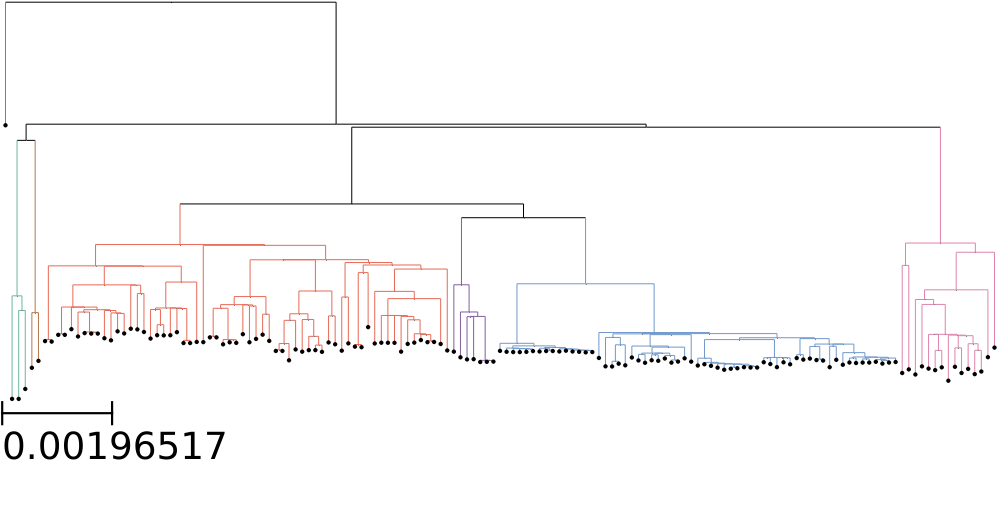

In [164]:
IQ_Tree.render("%%inline", w = 1000, tree_style = ts_IQ)

## Plot Allele presence/absence of TbD1 across Mtb phylogeny

In [165]:
def labelLeafsByPresAbs_SV(nodeToPresAbs_Dict, input_Tree):

    input_Tree_Labeled = input_Tree.copy()
        
    for n in input_Tree_Labeled.traverse():
        
        Node_NumEvents = nodeToPresAbs_Dict.get(n.name, 0)
    
        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style

        nstyle["size"] = 1 + Node_NumEvents

        if Node_NumEvents >= 7:
            nstyle["fgcolor"] = "green"
            
        if Node_NumEvents == 6:
            nstyle["fgcolor"] = "yellow"
            
        if Node_NumEvents == 5:
            nstyle["fgcolor"] = "pink"
            
        if Node_NumEvents == 4:
            nstyle["fgcolor"] = "purple"
            
        if Node_NumEvents == 3:
            nstyle["fgcolor"] = "orange"
            
        if Node_NumEvents == 2:
            nstyle["fgcolor"] = "blue"
            
        if Node_NumEvents == 1:
            nstyle["fgcolor"] = "red"
        if Node_NumEvents == 0:
            nstyle["fgcolor"] = "black"   
        
        n.set_style(nstyle)
        
        Node_PrimaryLin = node_To_PrimaryLin_Dict.get(n.name, "None")
        n.img_style["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        n.img_style["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        
        
        #n.img_style["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        #n.img_style["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
            
    return input_Tree_Labeled



#def plotRecombOnPhylo(i_ParentNode_Name, i_ChildNode_Name, input_Tree):
def labelLeafsByPresAbs_SV_0to2(nodeToPresAbs_Dict, input_Tree):

    input_Tree_Labeled = input_Tree.copy()
        
    # Draws nodes as small red spheres of diameter equal to 10 pixels
    #i_nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style
    #i_nstyle["shape"] = "sphere"
    #i_nstyle["size"] = 50
    #i_nstyle["fgcolor"] = "darkred" #"darkred"
    
    #for n in i_Gubbins_T.get_leaves():
    for n in input_Tree_Labeled.traverse():
        
        Node_Allele = nodeToPresAbs_Dict.get(n.name, 0)
    
        nstyle = ETE.NodeStyle() # http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html#node-style

        #nstyle["size"] = 1 + Node_NumEvents
        nstyle["size"] = 0
        nstyle["fgcolor"] = "black"   
        if n.is_leaf():
            if Node_Allele >= 2:
                nstyle["fgcolor"] = "blue"
                nstyle["size"] = 5
            if Node_Allele == 1:
                nstyle["fgcolor"] = "red"
                nstyle["size"] = 5

            if Node_Allele == 0:
                nstyle["fgcolor"] = "black"   
                nstyle["size"] = 1
            
        n.set_style(nstyle)
        
        Node_PrimaryLin = node_To_PrimaryLin_Dict.get(n.name, "None")
        n.img_style["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        n.img_style["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        
        
        #n.img_style["vt_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
        #n.img_style["hz_line_color"] = LinToColor_Dict.get(Node_PrimaryLin, "Black")
            
    return input_Tree_Labeled


ts_3 = ETE.TreeStyle()
ts_3.show_leaf_name = False
ts_3.show_branch_length = False
ts_3.show_branch_support = False
ts_3.show_scale = True #True
ts_3.branch_vertical_margin = 2
#ts_3.layout_fn = Mtb_ColorBranchByLineage_Layout
ts_3.rotation = 90
        

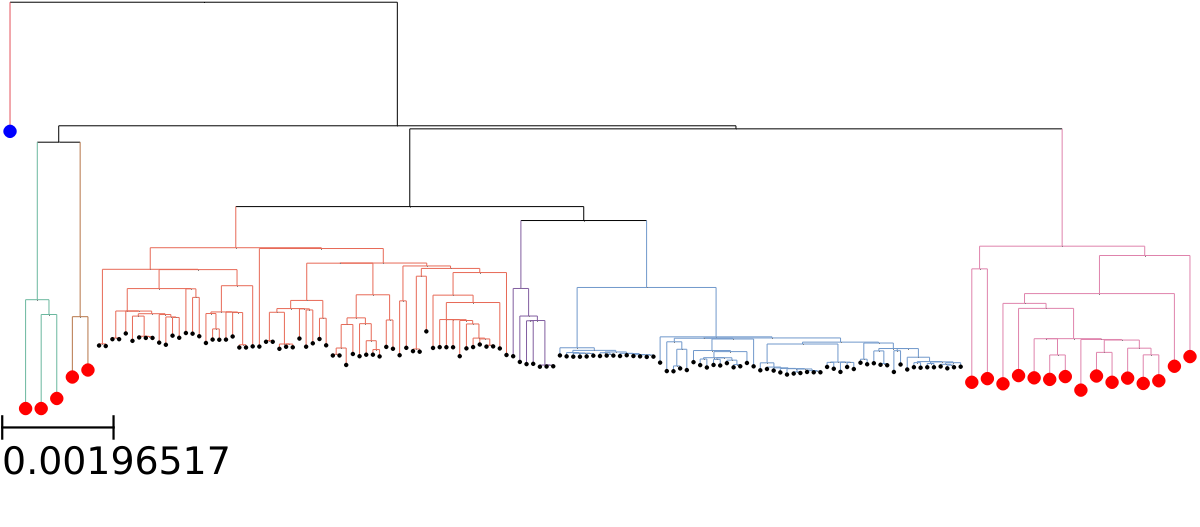

In [166]:
Tree_NumEvents_Labeled = labelLeafsByPresAbs_SV_0to2(dictOf_Tbd1_MultiAllele, IQ_Tree)

Tree_NumEvents_Labeled.render("%%inline", w = 1200, tree_style = ts_3)

In [167]:
Z = Tree_NumEvents_Labeled.render("Results2_Plots/SuppFig.TbD1.VizOnPhylo.151CI.png", w = 1000, tree_style = ts_3)   
Z = Tree_NumEvents_Labeled.render("Results2_Plots/SuppFig.TbD1.VizOnPhylo.151CI.svg", w = 1000, tree_style = ts_3)  

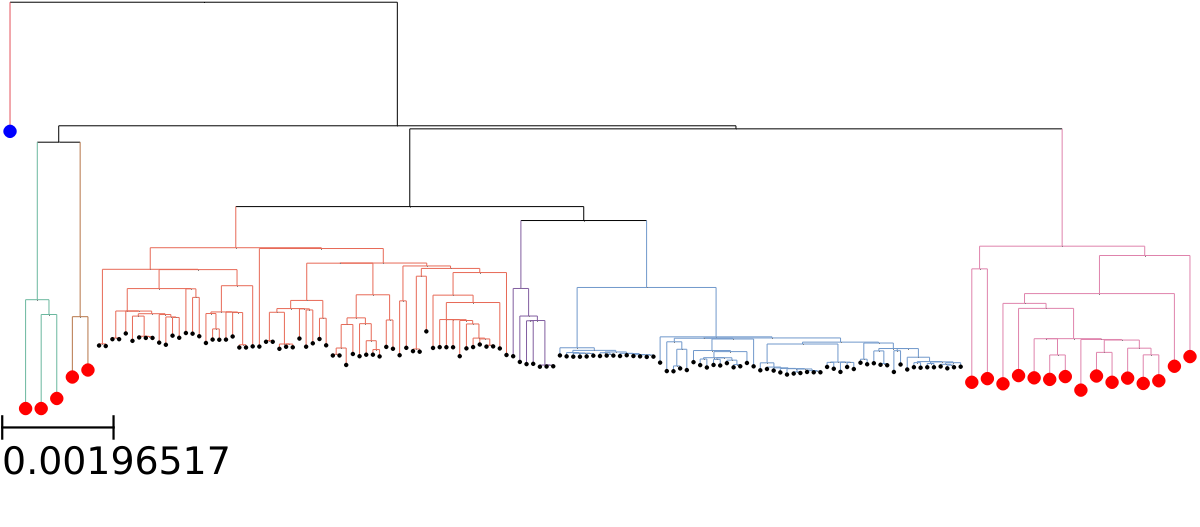

In [168]:
Tree_NumEvents_Labeled = labelLeafsByPresAbs_SV_0to2(dictOf_Tbd1_MultiAllele, IQ_Tree)

Tree_NumEvents_Labeled.render("%%inline", w = 1200, tree_style = ts_3)

# Define output dir of the Mtb-WGA-SMK processing pipeline

In [169]:
# Define varaint calling pipeline output directories

WGA_SMK_Outputs_Dir = "/n/data1/hms/dbmi/farhat/mm774/Projects/Mtb-WGA-SMK-Output"

WGA151CI_SMK_OutputDir = WGA_SMK_Outputs_Dir + "/231121_MtbSetV3_151CI"
MtbWGA_SMK_Pipeline_OutputDir = WGA151CI_SMK_OutputDir

## Define paths to all Assembly FAs + BAKTA Annotations (Short + Long read ASMs)

In [170]:
listOfSample_Tags = WGA151CI_SampleIDs

target_SMK_OutputDir = MtbWGA_SMK_Pipeline_OutputDir

SampleTag_ToPaths_Dict = {}

for SampleID in listOfSample_Tags:
    sample_Asm_OutputDir = target_SMK_OutputDir + "/AsmAnalysis/" + SampleID
    GenomeAnno_Dir = f"{sample_Asm_OutputDir}/GenomeAnnotation"
    
    # LR Bakta Anno Files
    Bakta_LR_AsmDir = f"{GenomeAnno_Dir}/{SampleID}_Asm_Bakta"

    dictOfPaths_Temp = {}
    dictOfPaths_Temp["LRAsm_Bakta_GFF"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.gff3" 
    dictOfPaths_Temp["LRAsm_Bakta_GBFF"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.gbff"
    dictOfPaths_Temp["LRAsm_Bakta_FAA"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.faa"    
    dictOfPaths_Temp["LRAsm_Bakta_FFN"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.ffn"    
    dictOfPaths_Temp["LRAsm_Bakta_FNA"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.fna"  
    dictOfPaths_Temp["LRAsm_Bakta_TXT"] = f"{Bakta_LR_AsmDir}/{SampleID}.Bakta.txt" 
    
    SampleTag_ToPaths_Dict[SampleID] = dictOfPaths_Temp



# Viz of genome annotations

## Import and setup DNA Features Viewer (For plotting H37rv genome annotations)

In [171]:
from dna_features_viewer import GraphicFeature, GraphicRecord, CircularGraphicRecord, BiopythonTranslator
from Bio import SeqIO

In [172]:
BiopythonTranslator.label_fields = ['gene', 'label', 'source', 'locus_tag', 'note', 'gene', 'product']
BiopythonTranslator.ignored_features_types = ["source", "gene"]

In [173]:
H37rv_Ref_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/References/GCF_000195955.2_ASM19595v2_genomic.gbk"

H37rv_Ref_records = list(SeqIO.parse(H37rv_Ref_GBK_PATH, "genbank"))

Mtb_H37rv_SeqIO_Record = H37rv_Ref_records[0]
Mtb_H37rv_Graphic_Record = BiopythonTranslator().translate_record(Mtb_H37rv_SeqIO_Record)

In [174]:
H37rv_Bakta_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/Projects/MtbPangenomeComp/MtbPangenomeExploration/Data/230302.PGAPvsBakta.Plots/H37Rv/Bakta_annotation_H37Rv/H37Rv.gbff"       

Rv_Bakta_records = list(SeqIO.parse(H37rv_Bakta_GBK_PATH, "genbank"))

Rv_Bakta_SeqIO_Record = Rv_Bakta_records[0]
Rv_Bakta_Graphic_Record = BiopythonTranslator().translate_record(Rv_Bakta_SeqIO_Record)

In [175]:
H37rv_PGAP_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/Projects/MtbPangenomeComp/MtbPangenomeExploration/Data/230302.PGAPvsBakta.Plots/H37Rv/PGAP_annotation_H37Rv/annot.gbk"       

Rv_PGAP_records = list(SeqIO.parse(H37rv_PGAP_GBK_PATH, "genbank"))

Rv_PGAP_SeqIO_Record = Rv_PGAP_records[0]
Rv_PGAP_Graphic_Record = BiopythonTranslator().translate_record(Rv_PGAP_SeqIO_Record)

### Test DNA Features Viewer's plotting function - Official Anno of H37Rv

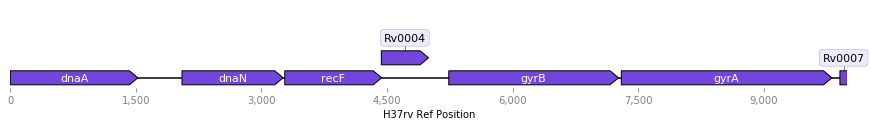

In [176]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 0
End_Coord = 10000
Mtb_H37rv_Graphic_Record_cropped = Mtb_H37rv_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.set(xlabel='H37rv Ref Position')
plt.show()

### Test DNA Features Viewer's plotting function - Bakta Anno of H37Rv

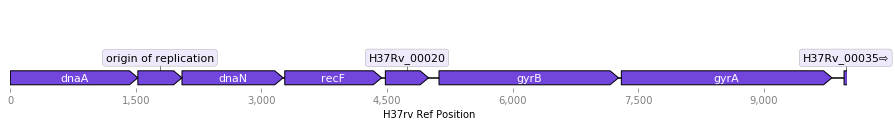

In [177]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 0
End_Coord = 10000
Rv_Bakta_Graphic_Record_cropped = Rv_Bakta_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Rv_Bakta_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.set(xlabel='H37rv Ref Position')
plt.show()

# Let's viz Tbd1 across some genomes

In [178]:
TbD1_SVInfo_Col = ["Chr", "Start", "End", "NA", "BubbleID", "NC_000962.3", "N0072", "RW-TB008"]

MG_SVInfo_DF.query("BubbleID == 'BubbleRegion_193'")[TbD1_SVInfo_Col]

,Chr,Start,End,NA,BubbleID,NC_000962.3,N0072,RW-TB008
192,NC_000962.3,1761789,1761789,3,BubbleRegion_193,0:+:NC_000962.3:1761780:1761791,1:+:N0072:1765264:1767428,2:+:RW-TB008:1766316:1769838


In [179]:
i_Bakta_GBFF_PATH = SampleTag_ToPaths_Dict["N0072"]["LRAsm_Bakta_GBFF"]

i_records = list(SeqIO.parse(i_Bakta_GBFF_PATH, "genbank"))

i_Mtb_SeqIO_Record = i_records[0]
i_Mtb_Graphic_Record = BiopythonTranslator().translate_record(i_Mtb_SeqIO_Record)

N0072_Mtb_Graphic_Record = i_Mtb_Graphic_Record


In [180]:
i_Bakta_GBFF_PATH = SampleTag_ToPaths_Dict["RW-TB008"]["LRAsm_Bakta_GBFF"]
i_records = list(SeqIO.parse(i_Bakta_GBFF_PATH, "genbank"))

i_Mtb_SeqIO_Record = i_records[0]
i_Mtb_Graphic_Record = BiopythonTranslator().translate_record(i_Mtb_SeqIO_Record)

RWTB008_Mtb_Graphic_Record = i_Mtb_Graphic_Record


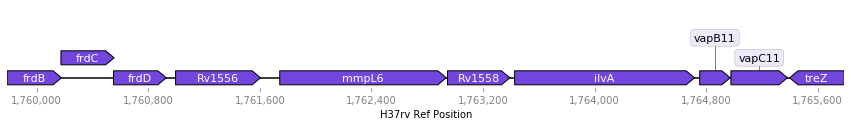

In [181]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 1761789 - 2000
End_Coord = 1761789 + 4000
Mtb_H37rv_Graphic_Record_cropped = Mtb_H37rv_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.set(xlabel='H37rv Ref Position')
plt.show()

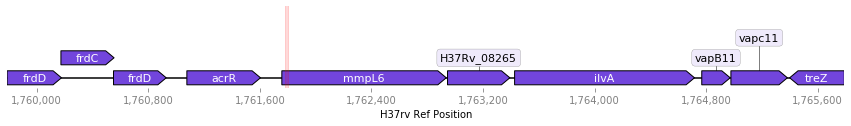

In [182]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 1761789 - 2000
End_Coord = 1761789 + 4000
Rv_Bakta_Graphic_Record_cropped = Rv_Bakta_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Rv_Bakta_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.fill_between((1761789- 10, 1761789 + 10), +1000, -1000, alpha=0.15, color = "red")

axs.set(xlabel='H37rv Ref Position')
plt.show()

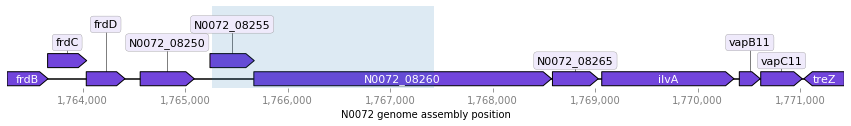

In [183]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 1765264 - 2000
End_Coord = 1767428 + 4000
Mtb_H37rv_Graphic_Record_cropped = N0072_Mtb_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.fill_between((1765264, 1767428), +1000, -1000, alpha=0.15)

axs.set(xlabel='N0072 genome assembly position')
plt.show()

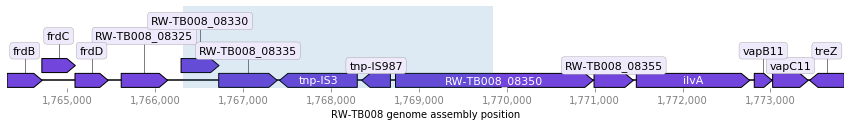

In [184]:
fig, axs = plt.subplots(1, 1, figsize=(15, 1.5), sharex=True)

Start_Coord = 1766316 - 2000
End_Coord = 1769838 + 4000
Mtb_H37rv_Graphic_Record_cropped = RWTB008_Mtb_Graphic_Record.crop((Start_Coord, End_Coord + 1))
Mtb_H37rv_Graphic_Record_cropped.plot(strand_in_label_threshold=5, ax = axs, plot_sequence = False)

axs.fill_between((1766316, 1769838), +1000, -1000, alpha=0.15)


axs.set(xlabel='RW-TB008 genome assembly position')
plt.show()

# Reread in genbank files to Seq Record

In [185]:
H37rv_Ref_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/References/GCF_000195955.2_ASM19595v2_genomic.gbk"
Rv_NCBI_records = list(SeqIO.parse(H37rv_Ref_GBK_PATH, "genbank"))
Rv_NCBI_record = Rv_NCBI_records[0]
len(Rv_NCBI_records)

1

In [186]:
H37rv_Bakta_GBK_PATH = "/n/data1/hms/dbmi/farhat/mm774/Projects/MtbPangenomeComp/MtbPangenomeExploration/Data/230302.PGAPvsBakta.Plots/H37Rv/Bakta_annotation_H37Rv/H37Rv.gbff"       
Rv_Bakta_records = list(SeqIO.parse(H37rv_Bakta_GBK_PATH, "genbank"))
Rv_Bakta_SeqIO_Record = Rv_Bakta_records[0]

In [187]:
i_Bakta_GBFF_PATH = SampleTag_ToPaths_Dict["N0072"]["LRAsm_Bakta_GBFF"]
i_records = list(SeqIO.parse(i_Bakta_GBFF_PATH, "genbank"))

N0072_Record = i_records[0]

In [188]:
i_Bakta_GBFF_PATH = SampleTag_ToPaths_Dict["RW-TB008"]["LRAsm_Bakta_GBFF"]
i_records = list(SeqIO.parse(i_Bakta_GBFF_PATH, "genbank"))

RWTB008_Record = i_records[0]

In [189]:
Tbd1_GBK_Dir = "./Tbd1_ClinkerViz"
!mkdir $Tbd1_GBK_Dir

mkdir: cannot create directory ‘./Tbd1_ClinkerViz’: File exists


## Subset Rv NCBI Record for Tbd1!

In [190]:
Rv_NCBI_record.seq

Seq('TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGGTCGTCTCC...TCG')

In [191]:
Rv_NCBI_Tbd1 = Rv_NCBI_record[1761789 - 2000: 1761789 + 4000]
len(Rv_NCBI_Tbd1.seq)

6000

In [192]:
with open(f"{Tbd1_GBK_Dir}/Rv_NCBI_Tbd1_Rec.gb", "w") as output_handle:
    SeqIO.write(Rv_NCBI_Tbd1, output_handle, "genbank")

## Subset Rv Bakta Record for Tbd1!

In [193]:
Rv_Bakta_SeqIO_Record.seq

Seq('TTGACCGATGACCCCGGTTCAGGCTTCACCACAGTGTGGAACGCGGTCGTCTCC...TCG')

In [194]:
Rv_Bakta_Tbd1 = Rv_Bakta_SeqIO_Record[1761789 - 2000: 1761789 + 4000]
len(Rv_Bakta_Tbd1.seq)

6000

In [195]:
with open(f"{Tbd1_GBK_Dir}/Rv_Bakta_Tbd1_Rec.gb", "w") as output_handle:
    SeqIO.write(Rv_Bakta_Tbd1, output_handle, "genbank")

## Subset N0072 Bakta Record for Tbd1!

In [196]:
N0072_Tbd1 = N0072_Record[1765264 - 2000: 1767428 + 4000]
len(N0072_Tbd1.seq)

8164

In [197]:
with open(f"{Tbd1_GBK_Dir}/N0072_Tbd1_Rec.gb", "w") as output_handle:
    SeqIO.write(N0072_Tbd1, output_handle, "genbank")

## Subset RW-TB008 Bakta Record for Tbd1!

In [198]:
RWTB008_Tbd1 = RWTB008_Record[1766316 - 2000: 1769838 + 4000]
len(RWTB008_Tbd1.seq)

9522

In [199]:
with open(f"{Tbd1_GBK_Dir}/RWTB008_Tbd1_Rec.gb", "w") as output_handle:
    SeqIO.write(RWTB008_Tbd1, output_handle, "genbank")

### look at the directory of genbanks subset for the TbD1 region of interest (L1, L4, L8 genomes)

In [200]:
!ls -1 $Tbd1_GBK_Dir/*.gb

./Tbd1_ClinkerViz/N0072_Tbd1_Rec.gb
./Tbd1_ClinkerViz/Rv_Bakta_Tbd1_Rec.gb
./Tbd1_ClinkerViz/Rv_NCBI_Tbd1_Rec.gb
./Tbd1_ClinkerViz/RWTB008_Tbd1_Rec.gb


## Run clinker to VIZ Tbd1 regions

In [100]:
!clinker --help

usage: clinker [-h] [--version] [-r RANGES [RANGES ...]] [-gf GENE_FUNCTIONS]
               [-na] [-i IDENTITY] [-j JOBS] [-s SESSION] [-ji JSON_INDENT]
               [-f] [-o OUTPUT] [-p [PLOT]] [-dl DELIMITER] [-dc DECIMALS]
               [-hl] [-ha] [-mo MATRIX_OUT] [-ufo]
               [files [files ...]]

clinker: Automatic creation of publication-ready gene cluster comparison figures.

clinker generates gene cluster comparison figures from GenBank files. It performs pairwise local or global alignments between every sequence in every unique pair of clusters and generates interactive, to-scale comparison figures using the clustermap.js library.

optional arguments:
  -h, --help            show this help message and exit
  --version             show program's version number and exit

Input options:
  files                 Gene cluster GenBank files
  -r RANGES [RANGES ...], --ranges RANGES [RANGES ...]
                        Scaffold extraction ranges. If a range is specified,


In [101]:

Tbd1_Viz_V2_HTML = f"{Tbd1_GBK_Dir}/clinkerviz.Tbd1.test2.html"

Rv_Bakta_GBK = f"{Tbd1_GBK_Dir}/Rv_Bakta_Tbd1_Rec.gb"
N0072_GBK = f"{Tbd1_GBK_Dir}/N0072_Tbd1_Rec.gb"
RWTB008_GBK = f"{Tbd1_GBK_Dir}/RWTB008_Tbd1_Rec.gb"

!clinker $Rv_Bakta_GBK $N0072_GBK $RWTB008_GBK --identity 0.3 --use_file_order -p $Tbd1_Viz_V2_HTML


[18:56:00] INFO - Starting clinker
[18:56:00] INFO - Parsing files:
[18:56:00] INFO -   Rv_Bakta_Tbd1_Rec.gb
[18:56:00] INFO -   N0072_Tbd1_Rec.gb
[18:56:00] INFO -   RWTB008_Tbd1_Rec.gb
[18:56:00] INFO - Starting cluster alignments
[18:56:00] INFO - Rv_Bakta_Tbd1_Rec vs N0072_Tbd1_Rec
[18:56:00] INFO - Rv_Bakta_Tbd1_Rec vs RWTB008_Tbd1_Rec
[18:56:00] INFO - N0072_Tbd1_Rec vs RWTB008_Tbd1_Rec
[18:56:00] INFO - Generating results summary...
Rv_Bakta_Tbd1_Rec vs N0072_Tbd1_Rec
-----------------------------------
Query                  Target                 Identity  Similarity
gnl|Bakta|H37Rv_08245  gnl|Bakta|N0072_08240  0.99      0.99      
gnl|Bakta|H37Rv_08250  gnl|Bakta|N0072_08245  1.00      1.00      
gnl|Bakta|H37Rv_08255  gnl|Bakta|N0072_08250  1.00      1.00      
gnl|Bakta|H37Rv_08260  gnl|Bakta|N0072_08260  0.40      0.40      
gnl|Bakta|H37Rv_08265  gnl|Bakta|N0072_08265  1.00      1.00      
gnl|Bakta|H37Rv_08270  gnl|Bakta|N0072_08270  1.00      1.00      
gnl|Bakta|H37Rv

In [105]:
!du -sh $Tbd1_Viz_V2_HTML

280K	./Tbd1_ClinkerViz/clinkerviz.Tbd1.test2.html


In [ ]:

# Tbd1_Viz_HTML = f"{Tbd1_GBK_Dir}/clinkerviz.Tbd1.test1.html"

# Rv_GBK = f"{Tbd1_GBK_Dir}/Rv_NCBI_Tbd1_Rec.gb"
# Rv_2_GBK = f"{Tbd1_GBK_Dir}/Rv_Bakta_Tbd1_Rec.gb"
# N0072_GBK = f"{Tbd1_GBK_Dir}/N0072_Tbd1_Rec.gb"
# RWTB008_GBK = f"{Tbd1_GBK_Dir}/RWTB008_Tbd1_Rec.gb"

# !clinker $Rv_GBK $Rv_2_GBK $N0072_GBK $RWTB008_GBK --identity 0.3 --use_file_order -p $Tbd1_Viz_HTML
